In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
from numpy import cos
from scipy.spatial import cKDTree

In [3]:
import fitsio
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline
import skimage.io
import cv2

In [60]:
LSLGAdir = os.getenv('LSLGA_DIR')
parent = os.path.join(LSLGAdir, 'sample', 'large-galaxies-parent.fits')
tycho2 = os.path.join(LSLGAdir, 'sample', 'tycho2.kd.fits')

In [61]:
galaxies = Table(fitsio.read(parent, ext=1)).to_pandas()
tycho = Table(fitsio.read(tycho2, ext=1)).to_pandas()

In [62]:
ramod = tycho.RA * cos(tycho.DEC)
locations = np.array([ramod, tycho.DEC]).T
tree = cKDTree(locations)

In [63]:
nearby = []
for gal in galaxies.itertuples():

    ra = gal.ra
    dec = gal.dec

    point = (ra * cos(dec), dec)
    near_list = tree.query_ball_point(point, np.degrees(0.2*(1/3600)))
    nearby.append(near_list)
    
nearby = np.array(nearby)

In [64]:
indices = []
groups = []
for ii, stars in enumerate(nearby):
    if len(stars) > 0:
        indices.append(ii)
        groups.append([ii, stars])

In [65]:
check = galaxies.loc[indices]

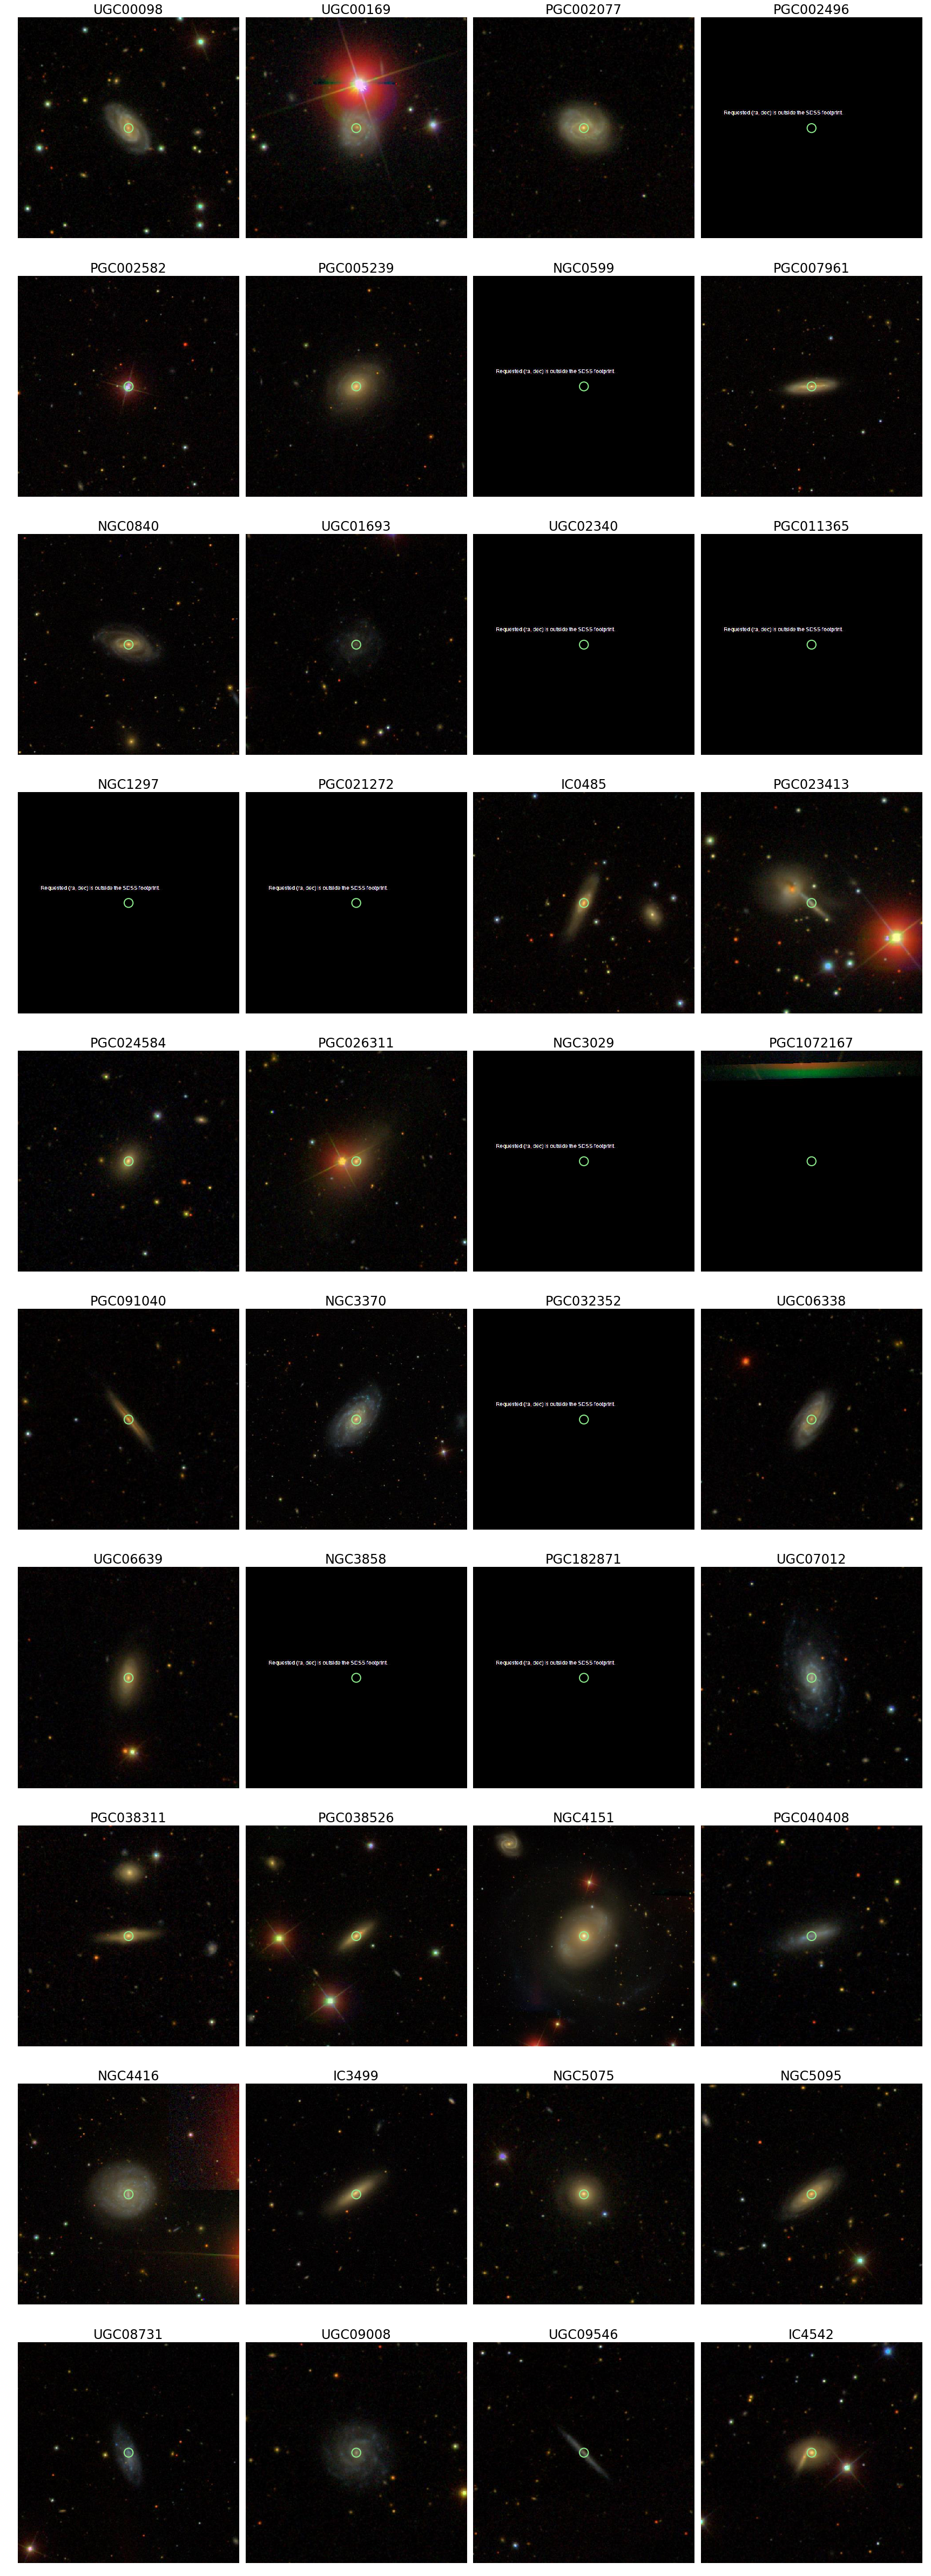

In [66]:
sample = check[:40]

width = 500
height = 500
pixelsize = 0.396
plt.figure(figsize=(30, 2.2*len(sample)))
subPlotNum = 1


for index, gal in sample.iterrows():

    # the 'scale' parameter is set so that the image will be about 2x the size of the galaxy
    scale=80*gal['d25']/pixelsize/width
    url="http://skyservice.pha.jhu.edu/DR14/ImgCutout/getjpeg.aspx?ra="+str(gal['ra'])
    url+="&dec="+str(gal['dec'])+"&scale="""+str(scale)+"&width="+str(width)
    url+="&height="+str(height)
    img=skimage.io.imread(url)
    
    ax = plt.subplot(np.ceil(len(sample)/4), 4, subPlotNum)
    
    subPlotNum += 1  
    plt.axis('off')
    plt.imshow(img)
    
    circ = Circle((250, 250), 10, facecolor='none', edgecolor='lightgreen', linewidth=2)
    ax.add_patch(circ)
    
    # show the object identifier (objId) above the image.
    plt.title(gal.galaxy.decode('utf-8'), fontsize=24)
    plt.subplots_adjust(wspace=0.03, hspace=0)

In [68]:
tycho.head()

TYC1  TYC2  TYC3          RA        DEC     MEAN_RA   MEAN_DEC  SIGMA_RA  \
0  7319   464     1  225.925531 -35.269154  225.925514 -35.269138  0.000013   
1  7319   568     1  225.886427 -35.332283  225.886439 -35.332283  0.000027   
2  7319   493     1  225.824297 -35.288769  225.824258 -35.288762  0.000020   
3  7319   764     1  225.759343 -35.404244  225.759334 -35.404240  0.000023   
4  7319  1003     1  225.679910 -35.308224  225.679923 -35.308246  0.000011   

   SIGMA_DEC   PM_RA  PM_DEC  SIGMA_PM_RA  SIGMA_PM_DEC     EPOCH_RA  \
0   0.000015 -0.0060  0.0069       0.0024        0.0025  1991.739990   
1   0.000031  0.0039  0.0001       0.0025        0.0026  1991.770020   
2   0.000026 -0.0141  0.0027       0.0028        0.0029  1991.760010   
3   0.000030 -0.0029  0.0019       0.0023        0.0025  1991.839966   
4   0.000014  0.0033 -0.0066       0.0019        0.0021  1991.770020   

     EPOCH_DEC  MAG_BT  MAG_VT  MAG_HP  
0  1991.569946  11.310  10.830     0.0  
1  1991.589966  12.700  11.886     0.0  
2  1991.469971  12.345  11.156     0.0  
3  1991.540039  12.230  11.970     0.0  
4  1991.489990  11.979  10.483     0.0